# <u>***EDA and engineering of Quality***<u>

### ***1. EDA -- What makes a review a good review?***

#### <u>used dataset: review_1918.csv<u>

---
---

#### ***1.1 Import necessary modules***

In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import string
import re

import nltk
from nltk.corpus import stopwords 

---

#### ***1.2 Set global parameters***

In [18]:
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['figure.dpi'] = 150

---

#### ***1.3 Import dataset***

In [3]:
df_rev = pd.read_csv('../data/yelp_dataset/review_1819.csv')

---

#### ***1.4 Overview of the dataset***

In [4]:
df_rev.shape

(1813646, 11)

In [5]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813646 entries, 0 to 1813645
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   review_id    object 
 2   user_id      object 
 3   business_id  object 
 4   stars        float64
 5   useful       int64  
 6   funny        int64  
 7   cool         int64  
 8   text         object 
 9   date         object 
 10  year         int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 152.2+ MB


In [6]:
df_rev.sample(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
1124833,4493643,oh4xA59PluLxs-d8Bt0VkQ,V9n9Cr9RMftPzfll9bIECQ,9glHMq7pkeH0mQ41LNuyIA,5.0,1,0,0,This location caters to the Veteran. I have be...,2018-06-04 02:41:45,2018
821456,3231471,o1AQnn66UqyyaQSit6c49A,62aR5tu1UIKyaNPAjTertw,q-zV08jt6U-q05SMEuQJAQ,4.0,0,1,0,The bests ever made it a good man with a good ...,2019-04-11 00:51:42,2019
677375,2648221,6v8of9Fl0o-n2liqOIT_6Q,G1EYFlAxs6eOuAt0Fktlpw,B3tLDhsfgQIQ7T9u3K9-uw,3.0,5,0,0,"Unfortunately, this is a nope from me. I used ...",2018-10-19 02:01:01,2018
1425709,5478400,_ciFVuLRvkXXNaNANTuIGA,iFj2C7SokUlz--4Jau3Z5A,-jsmtvdoUI-GJRSklYmEuA,1.0,3,0,0,Pets Best is simply put a fraud. They have ver...,2019-03-12 02:12:54,2019
649314,2559470,2vj1en2Zo4D3PIZjYwNiiA,ucV5_p9RtTzyUetqvXM0rQ,sFmUHGkeSMoRvsDRQCCjgA,5.0,0,0,0,These people were terrific. While I was waitin...,2018-06-26 13:00:01,2018
986385,3887416,tU6UvG8HMbgHHvy6v_GKBQ,mZdiL9vEpoyRfcHgPQcGdA,7pAgxBMUjrVPH7xh3fn-gw,2.0,0,0,0,This spot has a good location for wondering ar...,2019-09-02 23:39:44,2019
501855,1923765,5tq0k3luUntMTZcZIQbG5w,dg23yct0mR0TtWWcbbpUrQ,l2CuGoQb4ZFFQNnivegqqA,5.0,4,0,0,This is an excellent place for smog checks. Wo...,2018-04-04 01:13:59,2018
578846,2333864,KE3I4PCUg26kckmm3U63JA,DxqxvSnjW-DLBXR-k_6OdQ,dSRGkZP3IycrsGoAXE1pHA,5.0,0,0,0,This is the vegetarian/vegan pizza aesthetic t...,2018-10-29 14:42:39,2018
3137,24437,V9TRCAqNeptmo8GPnO762g,kWWZ9WkU_HhbgO77iwxDvg,Wndkw2PinAwTgjeUJOTdCg,5.0,0,0,0,Serious crafted coffee without taking themselv...,2018-02-02 05:12:40,2018
1221972,4708356,g9gweJ9z1FsEPnVg6GilRQ,imlQ92bazHwpoC_8_Rk2pQ,Aq30utWSpF_cR6mz1tUr_Q,1.0,0,0,0,I would give this company 0 starts if possible...,2019-04-11 20:03:04,2019


In [7]:
df_rev.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
dtype: int64

---

#### ***1.5 Cleaning the dataset***

In [8]:
# Dropping 'Unnamed: 0', 'date', 'year'

df_rev.drop(['Unnamed: 0', 'date', 'year'], axis=1, inplace=True)

---

#### ***1.6 Gain information on rating***

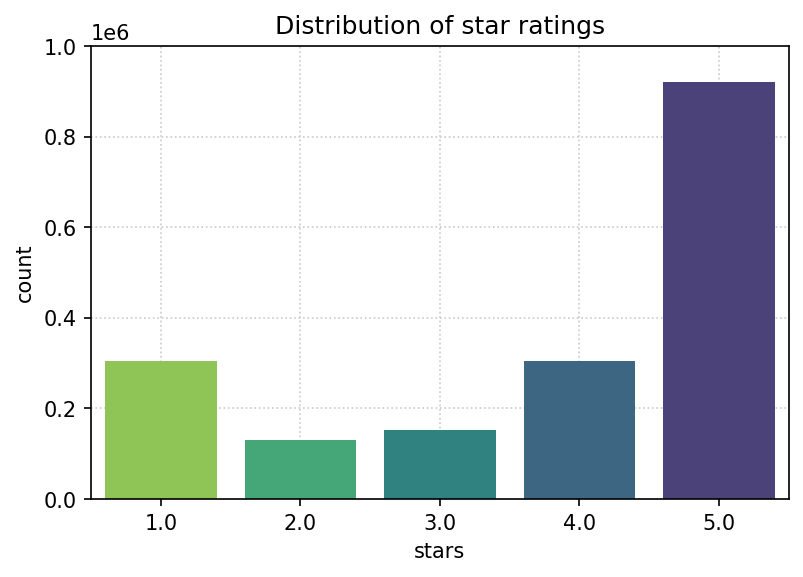

In [19]:
sns.countplot(data=df_rev, x='stars', palette='viridis_r', zorder=2)
plt.title('Distribution of star ratings')
plt.ylim(0, 1000000)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

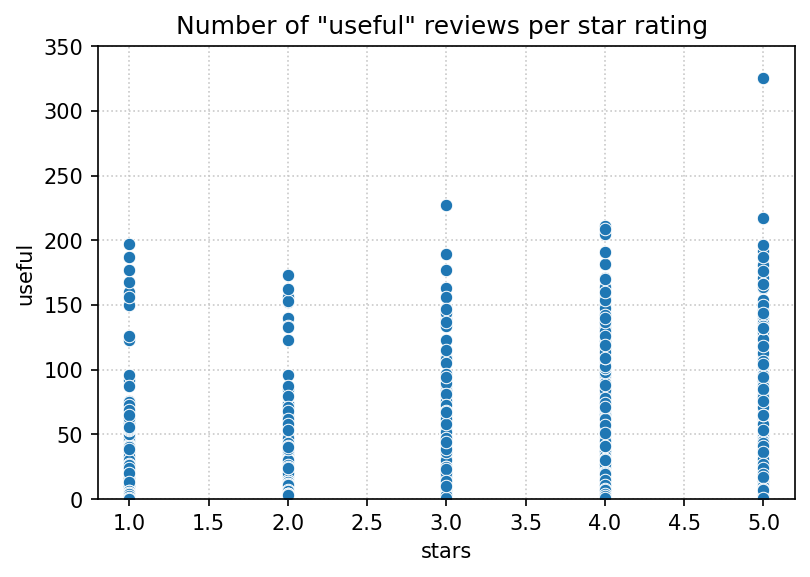

In [20]:
sns.scatterplot(data=df_rev, x='stars', y='useful', zorder=2)
plt.title('Number of "useful" reviews per star rating ')
plt.ylim(0, 350)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

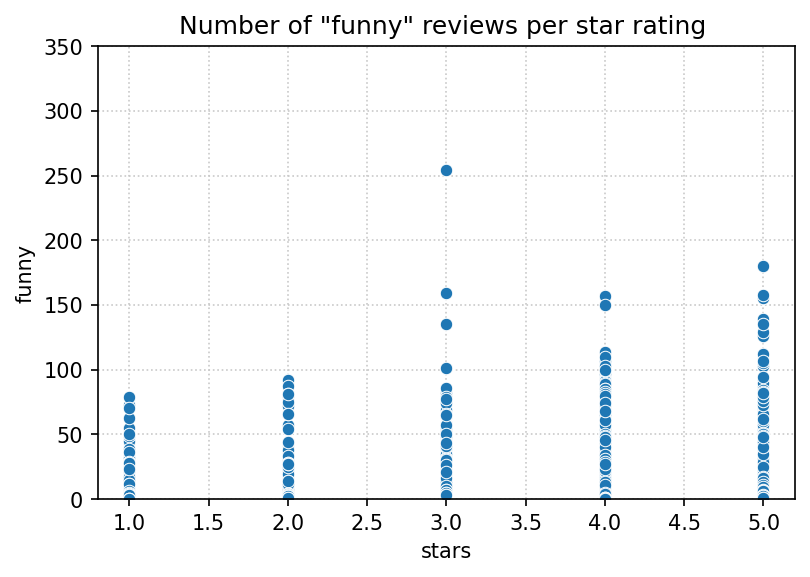

In [21]:
sns.scatterplot(data=df_rev, x='stars', y='funny', zorder=2)
plt.title('Number of "funny" reviews per star rating ')
plt.ylim(0, 350)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

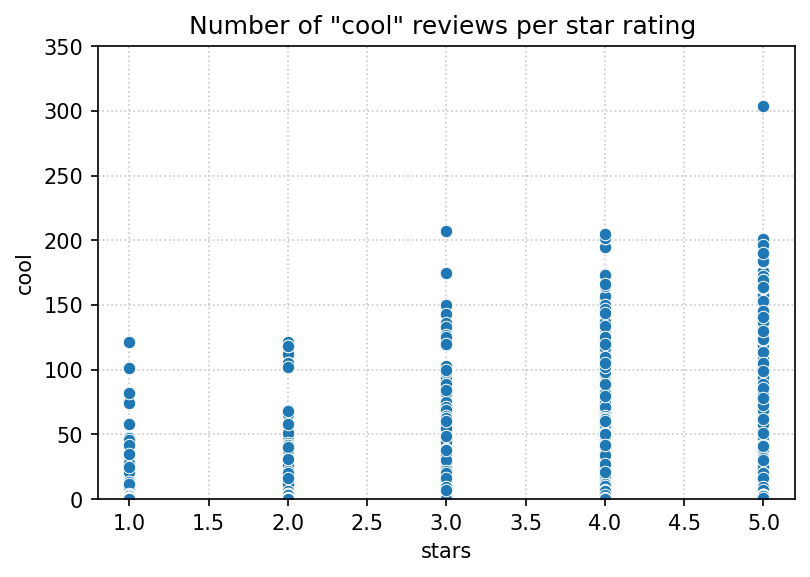

In [22]:
sns.scatterplot(data=df_rev, x='stars', y='cool', zorder=2)
plt.title('Number of "cool" reviews per star rating ')
plt.ylim(0, 350)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

In [23]:
df_corr = df_rev.drop(['review_id', 'user_id', 'business_id'], axis=1)

<AxesSubplot:>

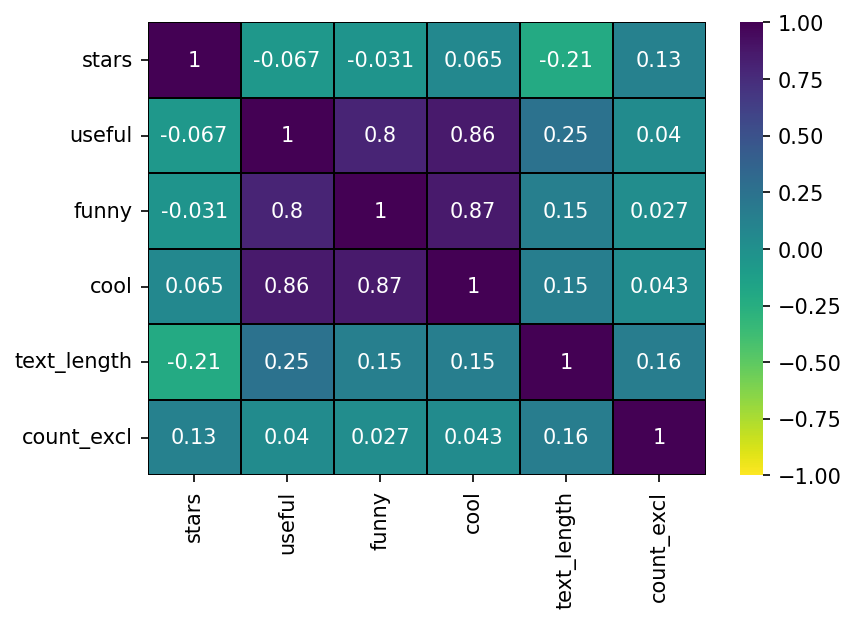

In [24]:
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis_r', linewidth=0.01, linecolor='k', vmin=-1, vmax=1)

***Without considering the actual review message there is no useable correlation between star rating and no. of usefulness of the reviews***

---

#### ***1.7 Gain information on texts***

In [51]:
# Get the length(including punctuation and spaces) of each review and save it to new column

df_rev['text_length'] = df_rev['text'].str.len()

# Get the number of unique words per review and save it to new column

df_rev['unique_words'] = df_rev['text'].apply(lambda x : len(set(str(x).split())))

# Get the number of english stopwords -- Takes pretty long to evaluate

# df_rev['stopwords'] = df_rev['text'].apply(lambda x : len([i for i in str(x).lower().split() if i in set(stopwords.words('english'))]))

In [26]:
# Get the number of used exclamation marks per review

df_rev['count_excl'] = df_rev['text'].str.count('!')

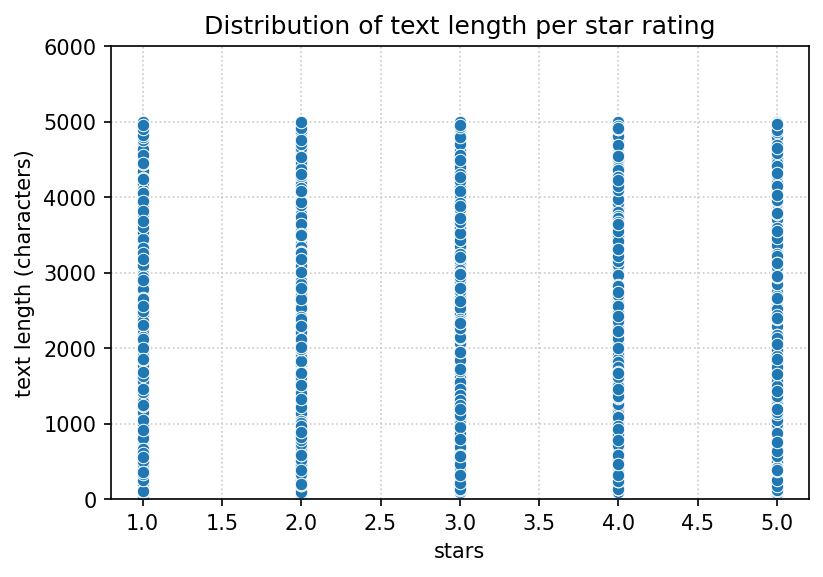

In [27]:
sns.scatterplot(data=df_rev, x='stars', y='text_length', zorder=2)
plt.title('Distribution of text length per star rating')
plt.ylim(0, 6000)
plt.ylabel('text length (characters)')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

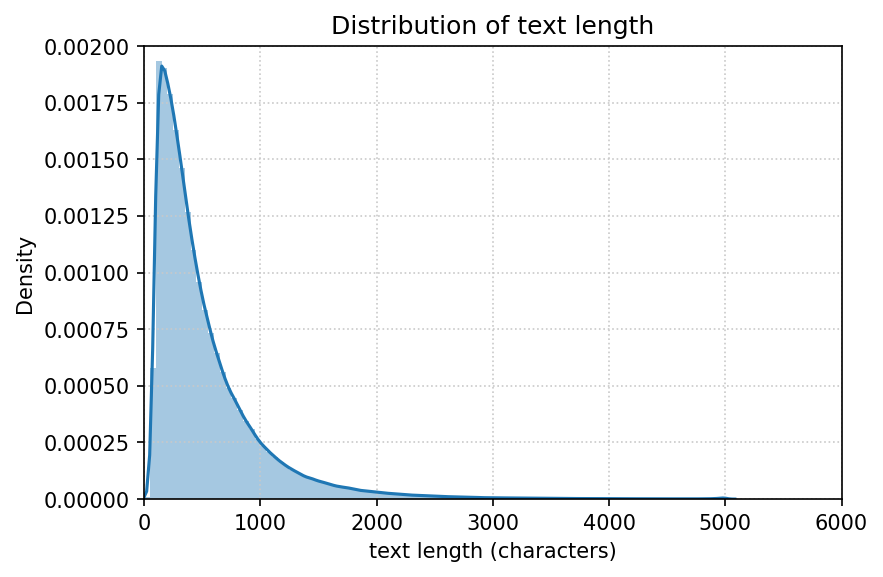

In [42]:
sns.distplot(df_rev['text_length'], bins=100)
plt.title('Distribution of text length')
plt.xlim(0, 6000)
plt.ylim(0, 0.002)
plt.xlabel('text length (characters)')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

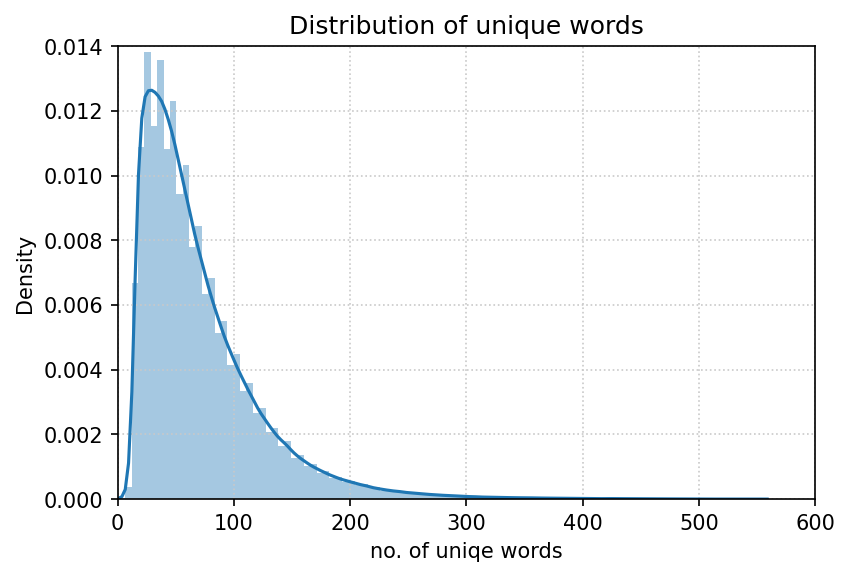

In [52]:
sns.distplot(df_rev['unique_words'], bins=100)
plt.title('Distribution of unique words')
plt.xlim(0, 600)
plt.ylim(0, 0.014)
plt.xlabel('no. of uniqe words')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

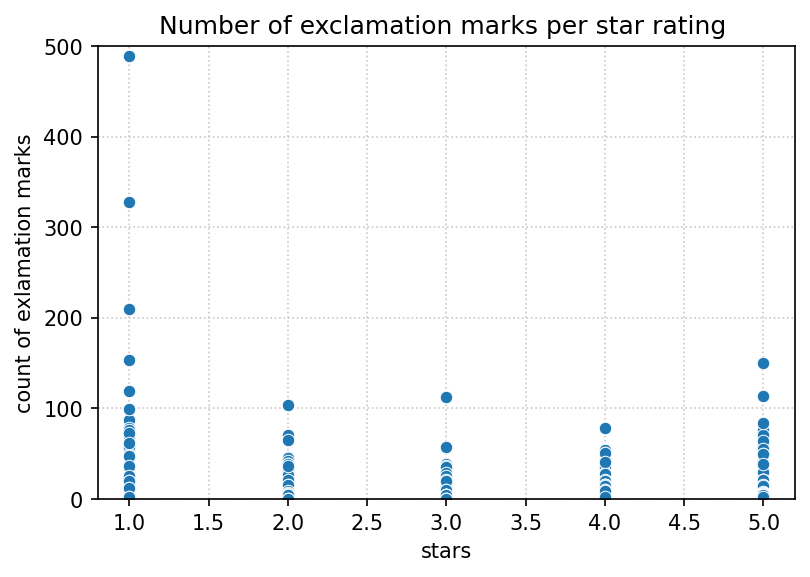

In [29]:
sns.scatterplot(data=df_rev, x='stars', y='count_excl', zorder=2)
plt.title('Number of exclamation marks per star rating ')
plt.ylim(0, 500)
plt.ylabel('count of exlamation marks')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

In [30]:
#df_rev[df_rev['count_excl'] > 450]
#df_rev['text'][156653]

In [31]:
df_corr_excl = df_rev.drop(['review_id', 'user_id', 'business_id'], axis=1)

<AxesSubplot:>

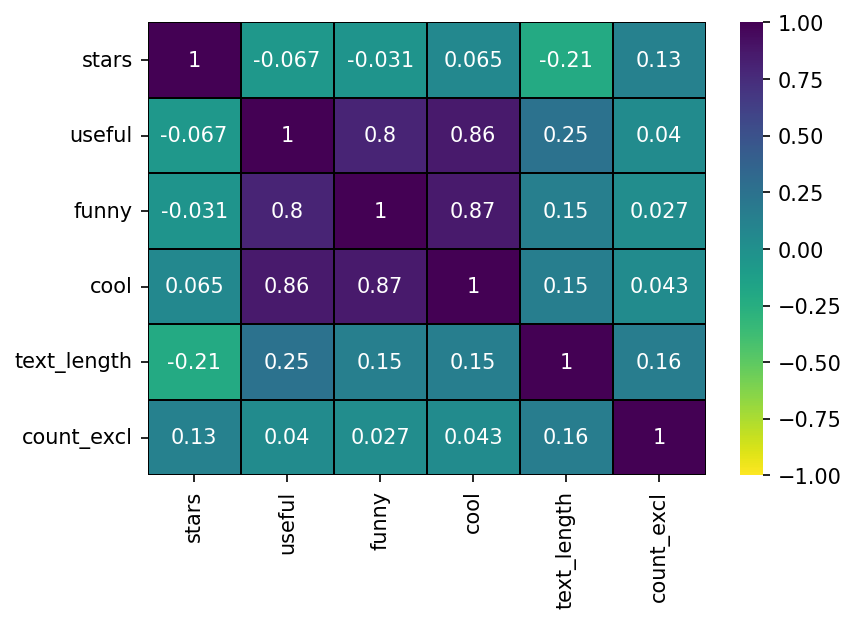

In [32]:
sns.heatmap(df_corr_excl.corr(), annot=True, cmap='viridis_r', linewidth=0.01, linecolor='k', vmin=-1, vmax=1)

---
---

#### <u>***1. Conclusion:***<u>

***There is no correlation between how the reviews are rated and the length of the review, the given stars or excessive use of exclamation marks. Therefore usefulness should be based on the actual content of the review.***

---
---